In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import missingno as msno
from collections import Counter
from itertools import chain, combinations
import sklearn as sk
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from random import shuffle
from sklearn.model_selection import train_test_split

# Oversampling

In [8]:
data5 = pd.read_csv("imputed_dataset_5.csv", engine='python').drop(['Unnamed: 0'], axis = 1)

In [9]:
data = pd.read_csv("imputed_dataset_5.csv", engine='python').drop(['Unnamed: 0'], axis = 1)
dep_data = data.copy()

dep_num = np.array([12, 11, 10, 4])
no_dep_num = np.setdiff1d(range(13), dep_num)

dep_data[['prim_diag', 'secd_diag']] = dep_data[['prim_diag', 'secd_diag']].replace(list(no_dep_num), 0)
dep_data[['prim_diag', 'secd_diag']] = dep_data[['prim_diag', 'secd_diag']].replace(list(dep_num), 1)

full = data.dropna(axis = 0, how = 'any')
dep = [x for x in data.columns if 'dep' in x or 'diag' in x or 'panic' in x]
dep_data['dep'] = dep_data['secd_diag'] + dep_data['prim_diag'] + 0 * dep_data['has_dep_diag']
dep_data['dep'] = dep_data['dep'].replace(range(2, 4), 1)
full = dep_data.dropna(axis = 0, how = 'any')
dep = [x for x in data.columns if 'dep' in x or 'diag' in x or 'panic' in x]

has_dep = full.query('dep == 1')
no_dep = full.query('dep == 0')
size = int(np.round(0.8 * min(len(has_dep), len(no_dep))))
sample = full.sample(8000)

sample = sample.sort_index()
sample = sample.reset_index(drop = True)


X_comb = sample.drop(dep, axis = 1).drop('dep', axis = 1)
Y_comb = sample['dep']
print('dataset shape %s' % Counter(Y_comb))

X_hasdep = data5.drop(['has_dep_diag'],axis=1).drop(['secd_diag'],axis=1).drop(['prim_diag'],axis=1).drop(['dep_score'],axis=1).drop(['dep_thoughts'],axis=1).drop(['panic_score'], axis=1).drop(['dep_band_15'], axis=1)
print(X_hasdep.shape)
Y_hasdep = np.array(data5['has_dep_diag'])
print(Y_hasdep.shape)
print('dataset shape %s' % Counter(Y_hasdep))

dataset shape Counter({0.0: 7719, 1.0: 281})
(13734, 35)
(13734,)
dataset shape Counter({0.0: 13344, 1.0: 390})


In [25]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN 
from imblearn import under_sampling

nb = 400
nl = 3760
ns = 240


#combined, imbalanced (original ratio), undersampling
smoteenn = SMOTEENN(random_state = 42, sampling_strategy=0.1)
rus = under_sampling.RandomUnderSampler(sampling_strategy={1.0: ns, 0.0: nl}, random_state=42)
X_combined_imb, Y_combined_imb = smoteenn.fit_resample(X_comb, Y_comb)
print(X_combined_imb.shape)
print(Y_combined_imb.shape)
print('Resampled dataset shape %s' % Counter(Y_combined_imb))
X_combined_imb, Y_combined_imb = rus.fit_resample(X_combined_imb, Y_combined_imb)
print(X_combined_imb.shape)
print(Y_combined_imb.shape)
print('Resampled dataset shape %s' % Counter(Y_combined_imb))

#combined, imbalanced (original ratio), oversampling

#combined, balanced, undersampling
smoteenn = SMOTEENN(random_state = 42, sampling_strategy=0.1)
rus = under_sampling.RandomUnderSampler(sampling_strategy={1.0: nb, 0.0: nb}, random_state=42)
X_combined_b, Y_combined_b = smoteenn.fit_resample(X_comb, Y_comb)
X_combined_b, Y_combined_b = rus.fit_resample(X_combined_b, Y_combined_b)
#rusboost.fit(X_combined_b, Y_combined_b)
#Y_combined_b = rusboost.predict(X_combined_b)
print(X_combined_b.shape)
print(Y_combined_b.shape)
print('Resampled dataset shape %s' % Counter(Y_combined_b))

#combined, balanced, oversampling

#has_dep_diag, imbalanced (original ratio), undersampling
smoteenn = SMOTEENN(random_state = 42, sampling_strategy=0.1)
rus = under_sampling.RandomUnderSampler(sampling_strategy={1.0: ns, 0.0: nl}, random_state=42)
X_hasdep_imb, Y_hasdep_imb = smoteenn.fit_resample(X_hasdep, Y_hasdep)
X_hasdep_imb, Y_hasdep_imb = rus.fit_resample(X_hasdep_imb, Y_hasdep_imb)
print(X_hasdep_imb.shape)
print(Y_hasdep_imb.shape)
print('Resampled dataset shape %s' % Counter(Y_hasdep_imb))

#has_dep_diag, imbalanced (original ratio), oversampling

#has_dep_diag, balanced, undersampling
smoteenn = SMOTEENN(random_state = 42, sampling_strategy=0.1)
rus = under_sampling.RandomUnderSampler(sampling_strategy={1.0: nb, 0.0: nb}, random_state=42)
X_hasdep_b, Y_hasdep_b = smoteenn.fit_resample(X_hasdep, Y_hasdep)
X_hasdep_b, Y_hasdep_b = rus.fit_resample(X_hasdep_b, Y_hasdep_b)
print(X_hasdep_b.shape)
print(Y_hasdep_b.shape)
print('Resampled dataset shape %s' % Counter(Y_hasdep_b))

#has_dep_diag, balanced, oversampling

(6819, 35)
(6819,)
Resampled dataset shape Counter({0.0: 6399, 1.0: 420})
(4000, 35)
(4000,)
Resampled dataset shape Counter({0.0: 3760, 1.0: 240})
(800, 35)
(800,)
Resampled dataset shape Counter({0.0: 400, 1.0: 400})
(4000, 35)
(4000,)
Resampled dataset shape Counter({0.0: 3760, 1.0: 240})
(800, 35)
(800,)
Resampled dataset shape Counter({0.0: 400, 1.0: 400})


In [13]:
from random import shuffle
from sklearn.model_selection import train_test_split

def shuffle_dataset(N, X, y, X_shuffled, y_shuffled):
    ind_list = [i for i in range(N)]
    shuffle(ind_list)
    X_shuffled  = X.iloc[ind_list]
    y_shuffled = y.iloc[ind_list]
    
def split_dataset(split, N, X, y):
    X_shuffled = X
    y_shuffled = y
    shuffle_dataset(N, pd. DataFrame(X), pd. DataFrame(y), pd. DataFrame(X_shuffled), pd. DataFrame(y_shuffled))
    X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled,test_size=split, random_state=40)
    return X_train, X_test, y_train, y_test

#combined, imbalanced (original ratio), undersampling
X_train_comb_imb, X_test_comb_imb, y_train_comb_imb, y_test_comb_imb = split_dataset(0.2, Y_combined_imb.size, X_combined_imb, Y_combined_imb)
print(X_train_comb_imb.shape); print(X_test_comb_imb.shape)
print(y_train_comb_imb.shape); print(y_test_comb_imb.shape)

#combined, balanced, undersampling
X_train_comb_b, X_test_comb_b, y_train_comb_b, y_test_comb_b = split_dataset(0.2, Y_combined_b.size, X_combined_b, Y_combined_b)
print(X_train_comb_b.shape); print(X_test_comb_b.shape)
print(y_train_comb_b.shape); print(y_test_comb_b.shape)

#has_dep_diag, imbalanced (original ratio), undersampling
X_train_hasdep_imb, X_test_hasdep_imb, y_train_hasdep_imb, y_test_hasdep_imb = split_dataset(0.2, Y_hasdep_imb.size, X_hasdep_imb, Y_hasdep_imb)
print(X_train_hasdep_imb.shape); print(X_test_hasdep_imb.shape)
print(y_train_hasdep_imb.shape); print(y_test_hasdep_imb.shape)

#has_dep_diag, balanced, undersampling
X_train_hasdep_b, X_test_hasdep_b, y_train_hasdep_b, y_test_hasdep_b = split_dataset(0.2, Y_hasdep_b.size, X_hasdep_b, Y_hasdep_b)
print(X_train_hasdep_b.shape); print(X_test_hasdep_b.shape)
print(y_train_hasdep_b.shape); print(y_test_hasdep_b.shape)

(3200, 35)
(800, 35)
(3200,)
(800,)
(640, 35)
(160, 35)
(640,)
(160,)
(3200, 35)
(800, 35)
(3200,)
(800,)
(640, 35)
(160, 35)
(640,)
(160,)


In [23]:
from sklearn import svm
from sklearn.svm import SVC



def plot_smote_to_F1(smote_ratio_start, smote_ratio_end, ns, nl):
    xs = np.array([])
    ys = np.array([])
    for n in range(smote_ratio_start, smote_ratio_end):
        nd = n/100
        xs = np.append(xs, nd)
        #combined, imbalanced (original ratio), undersampling
        smoteenn = SMOTEENN(random_state = 42, sampling_strategy=nd)
        #rus = under_sampling.RandomUnderSampler(sampling_strategy={1.0: ns, 0.0: nl}, random_state=42)
        X_combined_imb, Y_combined_imb = smoteenn.fit_resample(X_comb, Y_comb)
        print('Resampled dataset shape %s' % Counter(Y_combined_imb))
        #X_combined_imb, Y_combined_imb = rus.fit_resample(X_combined_imb, Y_combined_imb)

        #train-test split
        X_train_comb_imb, X_test_comb_imb, y_train_comb_imb, y_test_comb_imb = split_dataset(0.2, Y_combined_imb.size, X_combined_imb, Y_combined_imb)

        svm = SVC(C=5, gamma='auto', kernel='rbf')

        #train imbalanced, test imbalanced
        svm.fit(X_train_comb_imb, y_train_comb_imb)
        y_pred = svm.predict(X_test_comb_imb)
        print(f1_score(y_pred, y_test_comb_imb, average = 'macro'))
        ys = np.append(ys, f1_score(y_pred, y_test_comb_imb, average = 'macro'))
        
    plt.plot(xs, ys)
    plt.title('SMOTE ratio to F1 score')
    plt.xlabel('SMOTE ratio')
    plt.ylabel('F1 score')
    plt.show()

Resampled dataset shape Counter({0.0: 6399, 1.0: 420})
0.9388084699126689
Resampled dataset shape Counter({0.0: 6377, 1.0: 528})
0.8901649514053478
Resampled dataset shape Counter({0.0: 6341, 1.0: 634})
0.9197742678968781
Resampled dataset shape Counter({0.0: 6302, 1.0: 722})
0.9459182730800024
Resampled dataset shape Counter({0.0: 6234, 1.0: 805})
0.9299312341657617
Resampled dataset shape Counter({0.0: 6229, 1.0: 932})
0.9586461713601078
Resampled dataset shape Counter({0.0: 6185, 1.0: 1009})
0.9524195744349788
Resampled dataset shape Counter({0.0: 6175, 1.0: 1098})
0.9569842609275181
Resampled dataset shape Counter({0.0: 6137, 1.0: 1194})
0.9471706297030464
Resampled dataset shape Counter({0.0: 6125, 1.0: 1306})
0.9509930073938213
Resampled dataset shape Counter({0.0: 6112, 1.0: 1395})
0.941728858895956
Resampled dataset shape Counter({0.0: 6103, 1.0: 1458})
0.9574008527069423
Resampled dataset shape Counter({0.0: 6039, 1.0: 1552})
0.9389143147724384
Resampled dataset shape Counter(

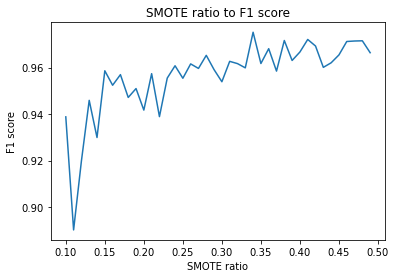

In [24]:
plot_smote_to_F1(10, 50, 240, 3760)

In [21]:
def plot_smote_to_variance(smote_ratio_start, smote_ratio_end, ns, nl):
    xs = np.array([])
    ys = np.array([])
    for n in range(smote_ratio_start, smote_ratio_end):
        nd = n/100
        xs = np.append(xs, nd)
        #combined, imbalanced (original ratio), undersampling
        smoteenn = SMOTEENN(random_state = 42, sampling_strategy=nd)
        #rus = under_sampling.RandomUnderSampler(sampling_strategy={1.0: ns, 0.0: nl}, random_state=42)
        X_combined_imb, Y_combined_imb = smoteenn.fit_resample(X_comb, Y_comb)
        print('Resampled dataset shape %s' % Counter(Y_combined_imb))
        #X_combined_imb, Y_combined_imb = rus.fit_resample(X_combined_imb, Y_combined_imb)


        ys = np.append(ys, Y_combined_imb.var())
        
    plt.plot(xs, ys)
    plt.title('SMOTE ratio to variance')
    plt.xlabel('SMOTE ratio')
    plt.ylabel('variance')
    plt.show()

Resampled dataset shape Counter({0.0: 6399, 1.0: 420})
Resampled dataset shape Counter({0.0: 6377, 1.0: 528})
Resampled dataset shape Counter({0.0: 6341, 1.0: 634})
Resampled dataset shape Counter({0.0: 6302, 1.0: 722})
Resampled dataset shape Counter({0.0: 6234, 1.0: 805})
Resampled dataset shape Counter({0.0: 6229, 1.0: 932})
Resampled dataset shape Counter({0.0: 6185, 1.0: 1009})
Resampled dataset shape Counter({0.0: 6175, 1.0: 1098})
Resampled dataset shape Counter({0.0: 6137, 1.0: 1194})
Resampled dataset shape Counter({0.0: 6125, 1.0: 1306})
Resampled dataset shape Counter({0.0: 6112, 1.0: 1395})
Resampled dataset shape Counter({0.0: 6103, 1.0: 1458})
Resampled dataset shape Counter({0.0: 6039, 1.0: 1552})
Resampled dataset shape Counter({0.0: 6039, 1.0: 1636})
Resampled dataset shape Counter({0.0: 6008, 1.0: 1697})
Resampled dataset shape Counter({0.0: 6048, 1.0: 1805})
Resampled dataset shape Counter({0.0: 5987, 1.0: 1872})
Resampled dataset shape Counter({0.0: 5968, 1.0: 1969}

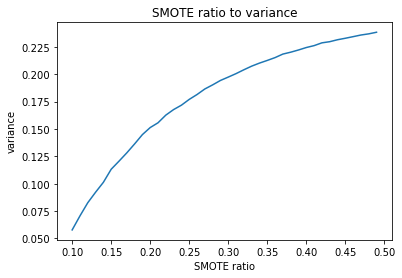

In [22]:
plot_smote_to_variance(10, 50, 240, 3760)

In [26]:
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf

from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout

def NN_Model_Dropout(neuron, activation, in_shape, classes, output_activation, optimizer, loss, dr):

    model = models.Sequential()

    ##Input Layer
    model.add(Dense(37, activation = activation, input_shape = in_shape))

    #Hidden Layers
    for i in neuron:

        model.add(Dense(i, activation = activation))
        #model.add(Dropout(dr))

    ##Ouput Layer
    model.add(Dense(classes, activation = output_activation))

    ##Compiling
    model.compile(optimizer = optimizer,
                  loss = loss,
                  metrics=['acc'])

    return model

from sklearn.model_selection import train_test_split
X_train_comb_imb, X_val_test_comb_imb, y_train_comb_imb, y_val_test_comb_imb = train_test_split(X_combined_imb, Y_combined_imb, test_size = 0.3, random_state = 40)
X_val_comb_imb, X_test_comb_imb, y_val_comb_imb, y_test_comb_imb = train_test_split(X_val_test_comb_imb, y_val_test_comb_imb, test_size = 0.5, random_state = 40)

print("X_train_comb_imb:", X_train_comb_imb.shape)
print("y_train_comb_imb:", y_train_comb_imb.shape)
print("X_val_comb_imb:", X_val_comb_imb.shape)
print("X_test_comb_imb:", X_test_comb_imb.shape)
print("y_val_comb_imb:", y_val_comb_imb.shape)
print("y_test_comb_imb:", y_test_comb_imb.shape)

#combined, balanced, undersampling
X_train_comb_b, X_val_test_comb_b, y_train_comb_b, y_val_test_comb_b = train_test_split(X_combined_b, Y_combined_b, test_size = 0.3, random_state = 40)
X_val_comb_b, X_test_comb_b, y_val_comb_b, y_test_comb_b = train_test_split(X_val_test_comb_b, y_val_test_comb_b, test_size = 0.5, random_state = 40)

print("X_train_comb_b:", X_train_comb_b.shape)
print("y_train_comb_b:", y_train_comb_b.shape)
print("X_val_comb_b:", X_val_comb_b.shape)
print("X_test_comb_b:", X_test_comb_b.shape)
print("y_val_comb_b:", y_val_comb_b.shape)
print("y_test_comb_b:", y_test_comb_b.shape)

#has_dep_diag, imbalanced (original ratio), undersampling
X_train_hasdep_imb, X_val_test_hasdep_imb, y_train_hasdep_imb, y_val_test_hasdep_imb = train_test_split(X_hasdep_imb, Y_hasdep_imb, test_size = 0.3, random_state = 40)
X_val_hasdep_imb, X_test_hasdep_imb, y_val_hasdep_imb, y_test_hasdep_imb = train_test_split(X_val_test_hasdep_imb, y_val_test_hasdep_imb, test_size = 0.5, random_state = 40)

print("X_train_hasdep_imb:", X_train_hasdep_imb.shape)
print("y_train_hasdep_imb:", y_train_hasdep_imb.shape)
print("X_val_hasdep_imb:", X_val_hasdep_imb.shape)
print("X_test_hasdep_imb:", X_test_hasdep_imb.shape)
print("y_val_hasdep_imb:", y_val_hasdep_imb.shape)
print("y_test_hasdep_imb:", y_test_hasdep_imb.shape)

#has_dep_diag, balanced, undersampling
X_train_hasdep_b, X_val_test_hasdep_b, y_train_hasdep_b, y_val_test_hasdep_b = train_test_split(X_hasdep_b, Y_hasdep_b, test_size = 0.3, random_state = 40)
X_val_hasdep_b, X_test_hasdep_b, y_val_hasdep_b, y_test_hasdep_b = train_test_split(X_val_test_hasdep_b, y_val_test_hasdep_b, test_size = 0.5, random_state = 40)

print("X_train_hasdep_b:", X_train_hasdep_b.shape)
print("y_train_hasdep_b:", y_train_hasdep_b.shape)
print("X_val_hasdep_b:", X_val_hasdep_b.shape)
print("X_test_hasdep_b:", X_test_hasdep_b.shape)
print("y_val_hasdep_b:", y_val_hasdep_b.shape)
print("y_test_hasdep_b:", y_test_hasdep_b.shape)

##from FFNeuralNetwork import NN_models

neurons = [35, 35]
fnn = NN_Model_Dropout(neuron = neurons, activation = 'relu', in_shape = (35,), classes = 2, output_activation = 'sigmoid', optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', dr = 0.4)
final_history = fnn.fit(X_train_comb_imb, y_train_comb_imb, epochs = 100, validation_data = (X_val_comb_imb, y_val_comb_imb), verbose = 0)
score = fnn.evaluate(X_test_comb_imb, y_test_comb_imb, verbose = 0, batch_size = 32)
print(score)


X_train_comb_imb: (2800, 35)
y_train_comb_imb: (2800,)
X_val_comb_imb: (600, 35)
X_test_comb_imb: (600, 35)
y_val_comb_imb: (600,)
y_test_comb_imb: (600,)
X_train_comb_b: (560, 35)
y_train_comb_b: (560,)
X_val_comb_b: (120, 35)
X_test_comb_b: (120, 35)
y_val_comb_b: (120,)
y_test_comb_b: (120,)
X_train_hasdep_imb: (2800, 35)
y_train_hasdep_imb: (2800,)
X_val_hasdep_imb: (600, 35)
X_test_hasdep_imb: (600, 35)
y_val_hasdep_imb: (600,)
y_test_hasdep_imb: (600,)
X_train_hasdep_b: (560, 35)
y_train_hasdep_b: (560,)
X_val_hasdep_b: (120, 35)
X_test_hasdep_b: (120, 35)
y_val_hasdep_b: (120,)
y_test_hasdep_b: (120,)
[0.1504105031490326, 0.9449999928474426]


In [28]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    f1 = 2*((precision*recall)/(precision+recall+K.epsilon()))
    return f1

def fnn_print_metrics(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name):
    model.fit(X_train, y_train, epochs = 100, validation_data = (X_val, y_val), verbose = 0)
    preds = model.predict(X_test)
    preds_choice = preds.argmax(1)
    #preds_choice = preds[:, 0]
    #f1 = f1_m(y_test, preds_choice)
    f1 = f1_score(y_test, preds_choice, average = 'macro')
    recall = recall_score(y_test, preds_choice, average = 'macro')
    precision = precision_score(y_test, preds_choice, average = 'macro')
    print(model_name + ': ')
    #print(f'F1: {f1}')
    #print(f'recall: {recall_m(y_test, preds_choice)}')
    #print(f'precision: {precision_m(y_test, preds_choice)}')
    print(f'F1: {f1}')
    print(f'recall: {recall}')
    print(f'precision: {precision}')

In [29]:
fnn_print_metrics(fnn, X_train_comb_imb, y_train_comb_imb, X_val_comb_imb, y_val_comb_imb, X_test_comb_imb, y_test_comb_imb, "FNN, combined, imbalanced")
fnn_print_metrics(fnn, X_train_comb_b, y_train_comb_b, X_val_comb_b, y_val_comb_b, X_test_comb_imb, y_test_comb_imb, "FNN, combined, b/imb")
fnn_print_metrics(fnn, X_train_comb_b, y_train_comb_b, X_val_comb_b, y_val_comb_b, X_test_comb_b, y_test_comb_b, "FNN, combined, balanced")
fnn_print_metrics(fnn, X_train_hasdep_imb, y_train_hasdep_imb, X_val_hasdep_imb, y_val_hasdep_imb, X_test_hasdep_imb, y_test_hasdep_imb, "FNN, has_dep_diag, imbalanced")
fnn_print_metrics(fnn, X_train_hasdep_b, y_train_hasdep_b, X_val_hasdep_b, y_val_hasdep_b, X_test_hasdep_b, y_test_hasdep_b, "FNN, has_dep_diag, balanced")

FNN, combined, imbalanced: 
F1: 0.6882145084182083
recall: 0.6936026936026936
precision: 0.6831858407079646
FNN, combined, b/imb: 
F1: 0.6743274222696186
recall: 0.9107744107744108
precision: 0.6368979766315189
FNN, combined, balanced: 
F1: 0.8582447362935167
recall: 0.8644781144781144
precision: 0.8617376775271512
FNN, has_dep_diag, imbalanced: 
F1: 0.6211539446065633
recall: 0.596360429693763
precision: 0.6721076746849943
FNN, has_dep_diag, balanced: 
F1: 0.8582447362935168
recall: 0.8695286195286196
precision: 0.8742540494458653


In [30]:
import sklearn.metrics

def plot_roc(model, X_train, y_train, X_val, y_val, X_test, y_test, title):
    model.fit(X_train, y_train, epochs = 100, validation_data = (X_val, y_val), verbose = 0)
    preds = model.predict(X_test)
    preds_choice = preds.argmax(1)
    fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, preds_choice)
    roc_auc = sklearn.metrics.auc(fpr, tpr)


    plt.title(title)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

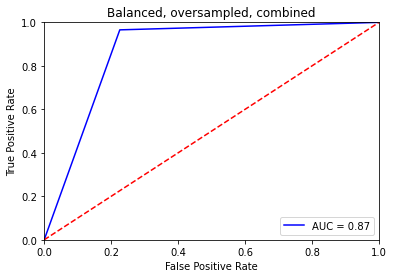

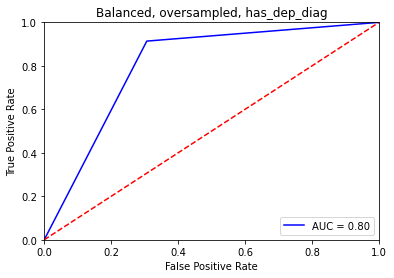

In [32]:
plot_roc(fnn, X_train_comb_b, y_train_comb_b, X_val_comb_b, y_val_comb_b, X_test_comb_b, y_test_comb_b, "Balanced, oversampled, combined")
plot_roc(fnn, X_train_hasdep_b, y_train_hasdep_b, X_val_hasdep_b, y_val_hasdep_b, X_test_hasdep_b, y_test_hasdep_b, "Balanced, oversampled, has_dep_diag")